In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [22]:
xl_to_date = lambda x: pd.to_datetime(x, unit='D', origin='1899-12-30')
df = pd.read_excel('RF_selected_pgh_neighborhoods_skinny.xlsx', converters={'PERIOD_BEGIN': xl_to_date, 'PERIOD_END': xl_to_date})

In [23]:
df.columns = df.columns.str.lower()

In [24]:
df.head(1)

,year,month,region,property_type,median_sale_price,median_sale_price_mom,median_list_price_mom,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list
0,2012,3,Allegheny West,CNDO,235000.0,NaN,NaN,56.66747,NaN,1,1.0,NaN,NaN,698.0,0.87037,0.0


In [25]:
type_cats = pd.api.types.CategoricalDtype(categories=df.property_type.unique(), ordered=True)
#type_id_cats = pd.api.types.CategoricalDtype(categories=df.property_type_id.unique(), ordered=True)

In [26]:
df.property_type = df.property_type.astype(type_cats)
#df.property_type_id = df.property_type_id.astype(type_id_cats)

In [27]:
df[df.property_type == 'SFH'].iloc[1]

year                               2012
month                                 5
region                   Allegheny West
property_type                       SFH
median_sale_price              370000.0
median_sale_price_mom               0.0
median_list_price_mom               NaN
median_ppsf                  125.679348
median_list_ppsf              98.683741
homes_sold                            1
pending_sales                       1.0
new_listings                        1.0
inventory                           NaN
median_dom                        122.0
avg_sale_to_list               0.870588
sold_above_list                     0.0
Name: 5, dtype: object

In [28]:
df.describe(exclude=[object])

,year,month,property_type,median_sale_price,median_sale_price_mom,median_list_price_mom,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list
count,30936.000000,30936.000000,30936,3.093600e+04,28783.000000,25170.000000,30253.000000,27006.000000,30936.000000,29032.000000,27472.000000,19433.000000,30893.000000,30879.000000,30936.000000
unique,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,ALL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,10057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2018.171903,6.431762,NaN,2.367482e+05,0.092410,0.060385,142.249956,155.341157,15.623869,18.197058,21.091948,25.528328,109.266144,0.951972,0.176303
std,3.762901,3.424514,NaN,1.728320e+05,6.693049,1.050989,82.971044,88.306216,40.877619,46.413070,52.042432,59.627823,101.476328,0.073160,0.247664
min,2012.000000,1.000000,NaN,1.000000e+00,-0.999995,-0.997170,0.021287,0.781250,1.000000,1.000000,1.000000,1.000000,1.000000,0.502513,0.000000
25%,2015.000000,3.000000,NaN,1.237250e+05,-0.055556,-0.063655,82.771147,93.388597,2.000000,2.000000,2.000000,3.000000,55.000000,0.926489,0.000000
50%,2018.000000,6.000000,NaN,1.999000e+05,0.000000,0.000000,132.275132,143.247348,4.000000,5.000000,6.000000,9.000000,79.000000,0.956801,0.083333
75%,2021.000000,9.000000,NaN,3.050000e+05,0.071429,0.082237,187.500000,201.329338,13.000000,15.000000,18.000000,22.000000,126.000000,0.982873,0.250000


In [35]:
data = df[(df.year >= 2024)&(df.property_type=="SFH")]  # &(df.region=="Bloomfield")

In [36]:
data.describe()

,year,month,median_sale_price,median_sale_price_mom,median_list_price_mom,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list
count,798.000000,798.000000,7.980000e+02,765.000000,696.000000,797.000000,731.000000,798.000000,759.000000,732.000000,725.000000,798.000000,797.000000,798.000000
mean,2024.132832,5.842105,3.016703e+05,0.053029,0.047153,176.942919,187.585268,18.022556,22.169960,24.566940,25.564138,75.049499,0.980393,0.286054
std,0.339606,3.621715,1.897036e+05,0.369560,0.368309,74.092378,76.793242,40.167928,48.224151,52.961175,53.626835,53.927472,0.082081,0.261360
min,2024.000000,1.000000,1.000000e+04,-0.851475,-0.702811,5.291005,19.339990,1.000000,1.000000,1.000000,1.000000,1.000000,0.502513,0.000000
25%,2024.000000,2.000000,1.729150e+05,-0.054545,-0.040360,123.809524,132.379033,2.000000,3.000000,4.000000,4.000000,47.000000,0.953835,0.076923
50%,2024.000000,6.000000,2.575000e+05,0.000000,0.000000,173.708920,182.491944,7.000000,9.000000,10.000000,11.000000,57.500000,0.976582,0.250000
75%,2024.000000,9.000000,3.793750e+05,0.073333,0.082913,229.135958,232.362822,14.000000,17.000000,18.250000,19.000000,91.500000,1.004029,0.411765
max,2025.000000,12.000000,1.125000e+06,5.663333,6.996000,371.912037,561.523438,265.000000,295.000000,343.000000,316.000000,565.000000,1.775517,1.000000


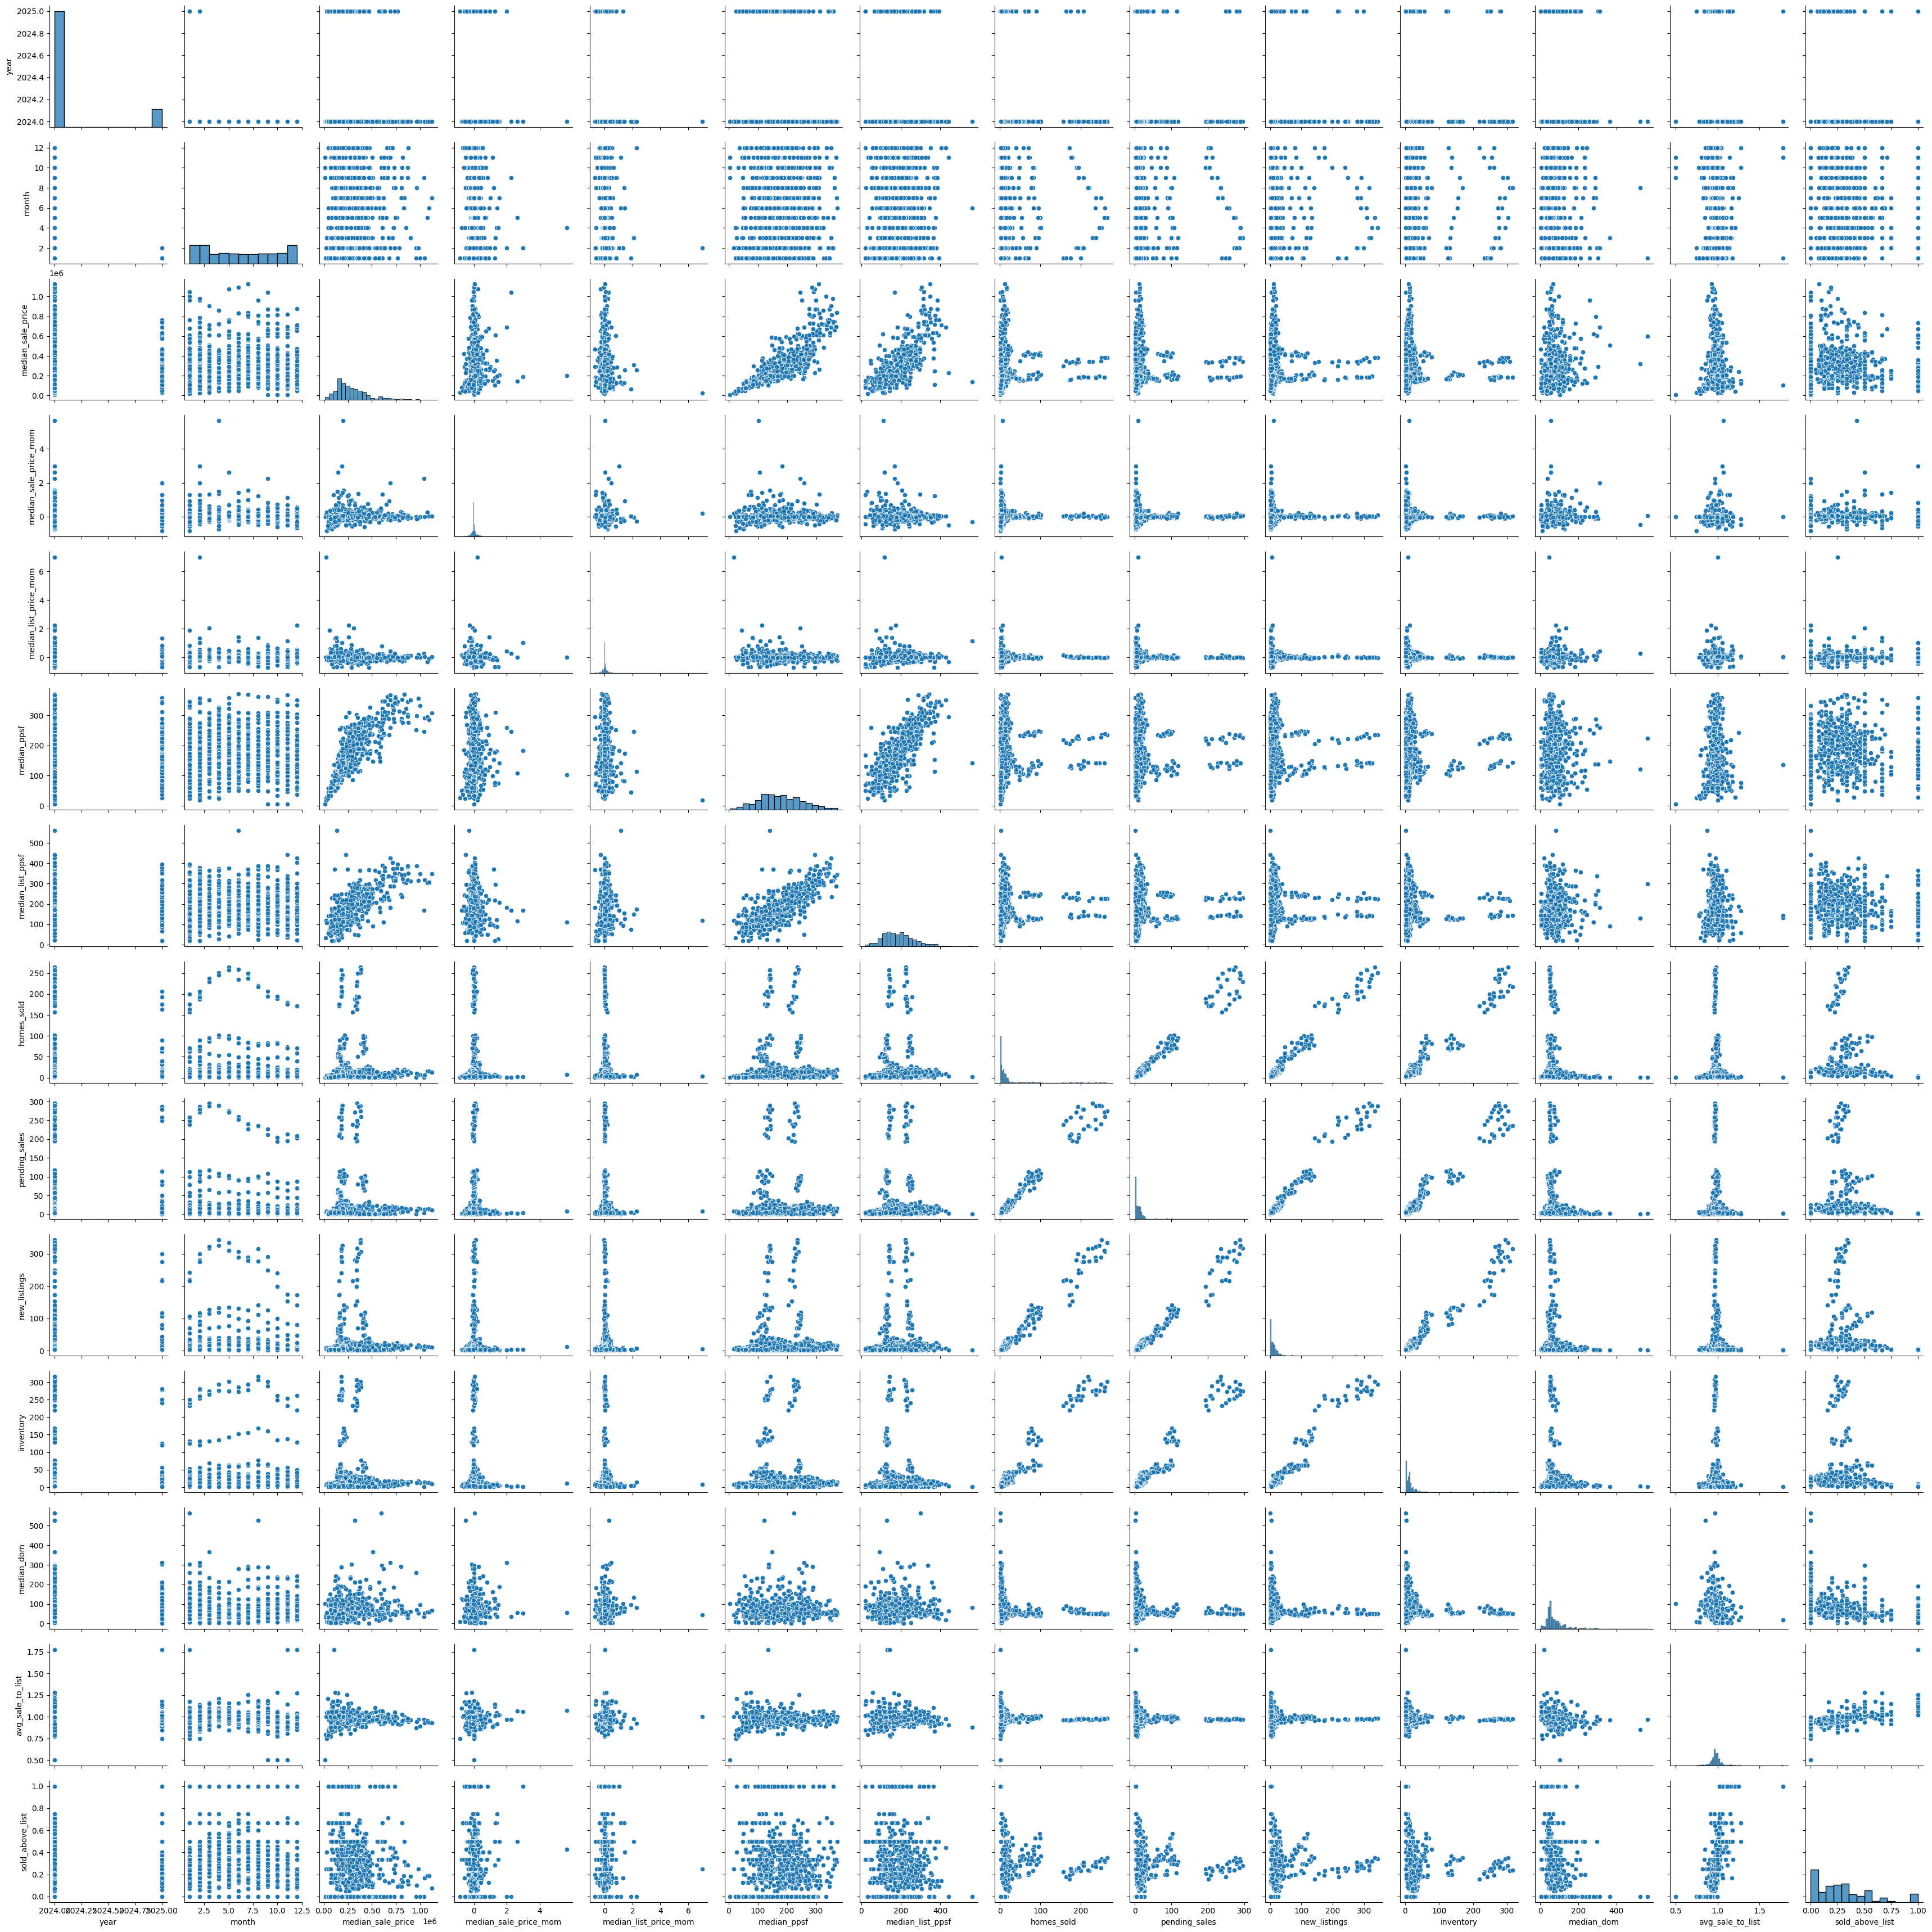

In [37]:
sns.pairplot(data)